In [3]:
pip install boto3

Note: you may need to restart the kernel to use updated packages.Collecting boto3
     -------------------------------------- 132.5/132.5 kB 2.6 MB/s eta 0:00:00
     ---------------------------------------- 79.6/79.6 kB ? eta 0:00:00
     ---------------------------------------- 9.8/9.8 MB 8.7 MB/s eta 0:00:00
     -------------------------------------- 140.4/140.4 kB 8.1 MB/s eta 0:00:00




[notice] A new release of pip available: 22.2.1 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install pandas


     --------------------------------------- 10.4/10.4 MB 31.2 MB/s eta 0:00:00
     ------------------------------------- 498.1/498.1 kB 15.7 MB/s eta 0:00:00
     --------------------------------------- 14.6/14.6 MB 34.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip available: 22.2.1 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import boto3
import pandas as pd
s3 = boto3.client("s3" )
bucket_name = "project-data-maiythack"
s3_object = "power.txt"
obj = s3.get_object(Bucket=bucket_name, Key=s3_object)
df = pd.read_csv(obj['Body'], sep = ";")

C:\Users\mavic\AppData\Local\Temp\ipykernel_50188\1845144713.py:7: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(obj['Body'], sep = ";")


In [2]:
df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0


In [4]:
df['Date'] = pd.to_datetime(df['Date']).dt.strftime('%m/%d/%Y')

df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,12/16/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,12/16/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,12/16/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,12/16/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,12/16/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,11/26/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,11/26/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,11/26/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,11/26/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0


In [5]:
df[df.isnull().any(axis=1)]

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
6839,12/21/2006,11:23:00,?,?,?,?,?,?,NaN
6840,12/21/2006,11:24:00,?,?,?,?,?,?,NaN
19724,12/30/2006,10:08:00,?,?,?,?,?,?,NaN
19725,12/30/2006,10:09:00,?,?,?,?,?,?,NaN
41832,01/14/2007,18:36:00,?,?,?,?,?,?,NaN
...,...,...,...,...,...,...,...,...,...
1990185,09/28/2010,19:09:00,?,?,?,?,?,?,NaN
1990186,09/28/2010,19:10:00,?,?,?,?,?,?,NaN
1990187,09/28/2010,19:11:00,?,?,?,?,?,?,NaN
1990188,09/28/2010,19:12:00,?,?,?,?,?,?,NaN


In [7]:
import numpy as np

In [8]:
df['Global_active_power'].replace('?', np.nan, inplace = True)
df['Global_reactive_power'].replace('?', np.nan, inplace = True)
df['Voltage'].replace('?', np.nan, inplace = True)
df['Global_intensity'].replace('?', np.nan, inplace = True)
df['Sub_metering_1'].replace('?', np.nan, inplace = True)
df['Sub_metering_2'].replace('?', np.nan, inplace = True)

In [9]:
df.isnull().sum()

Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [104]:
df2=df.dropna()
df2

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,12/16/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,12/16/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,12/16/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,12/16/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,12/16/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,11/26/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,11/26/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,11/26/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,11/26/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0


In [105]:
df2.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


In [121]:
x=df2.iloc[:,-3:]
x.head()

,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,0.000,1.000,17.0
1,0.000,1.000,16.0
2,0.000,2.000,17.0
3,0.000,1.000,17.0
4,0.000,1.000,17.0


In [122]:
y=df2.iloc[:,2]
y.head()

0    4.216
1    5.360
2    5.374
3    5.388
4    3.666
Name: Global_active_power, dtype: object

In [123]:
# split data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [126]:
knn=KNeighborsClassifier(n_neighbors=5, weights='distance', metric='euclidean')
knn.fit(x_train, y_train)

TypeError: '<' not supported between instances of 'float' and 'str'

In [125]:
# calculate accuracy score
y_pred=knn.predict(x_test)
print('Accuracy of test set=', accuracy_score(y_test, y_pred)*100)

AttributeError: 'KNeighborsClassifier' object has no attribute 'n_samples_fit_'

In [112]:
# mse: closeness of fitted line to the data points; smaller mse = closer fit to data
# rmse: square root of mse; better measure of goodness of fit
# r2: (total variance explained by the model) / total variance; coefficient of determination

# training set: trains the model
# testing set: tests whether the built model is correct or not

# key with creating training and test sets: you're predicting x
# y comes into play when computing for mse

# simple model performance for training set
y_train_predict = model.predict(x_train)
mse = mean_squared_error(y_train, y_train_predict)
rmse = np.sqrt(mse)

r2 = round(model.score(x_test, y_test),2)

print('Simple model performance for training set:')
print('MSE is:', mse)
print('RMSE is:', rmse)
print('r2 (model) score is:', r2)

Simple model performance for training set:
MSE is: 28.983678616003186
RMSE is: 5.383649191394549
r2 (model) score is: 0.23


In [115]:
# simple model performance for test set
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

r2 = round(model.score(x_test, y_test),2)

print('Simple model performance for test set:')
print('MSE is:', mse)
print('RMSE is:', rmse)
print('r2 (model) score is:', r2)

Simple model performance for test set:
MSE is: 28.946206757296103
RMSE is: 5.38016791162656
r2 (model) score is: 0.23


TypeError: 'value' must be an instance of str or bytes, not a float

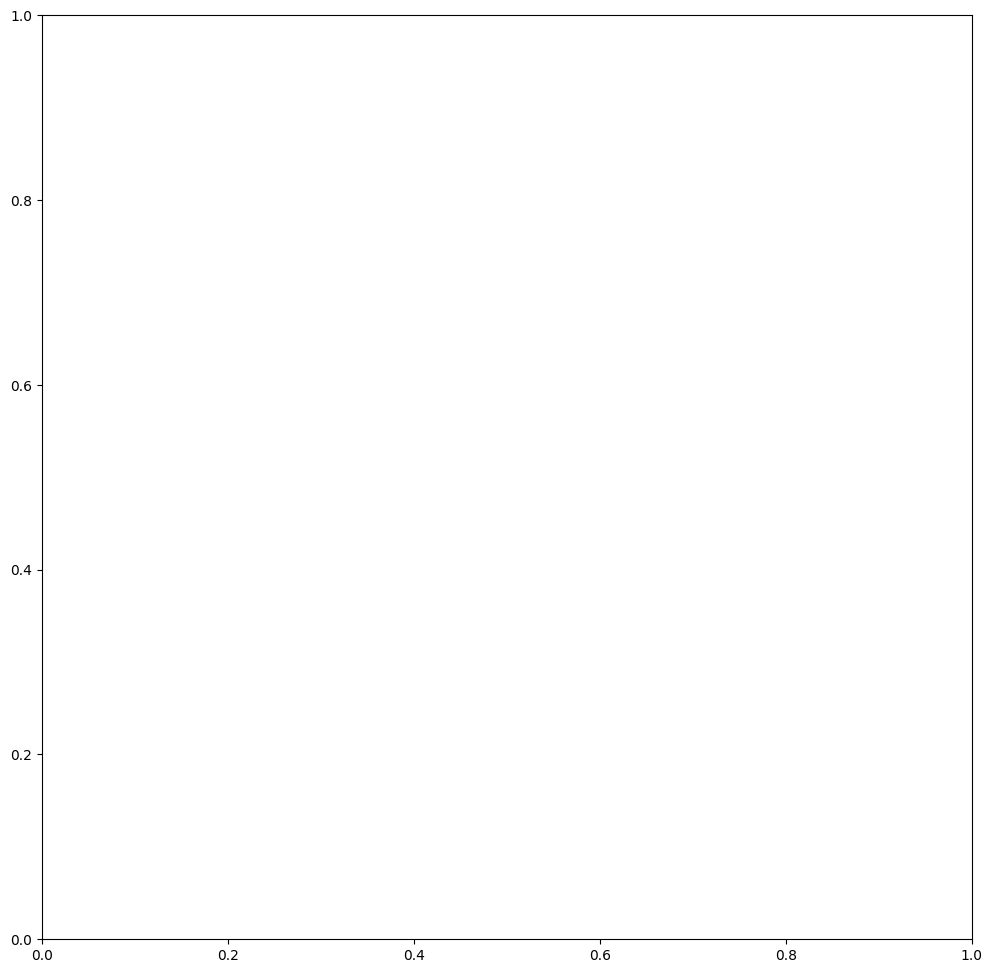

In [116]:
# plot original house prices vs predicted house prices
plt.figure(figsize=(12, 12))
plt.scatter(y_test, y_pred, marker='.')
plt.plot(y_pred, y_pred, color = 'red', linewidth = 1)     # Identity line

plt.show()